**K-Means CLUSTERING!! - 360DIGITMG**

Clustering algorithms are unsupervised machine learning algorithms so there is no label associated with data points.
Clustering algorithms look for similarities or dissimilarities among data points so that similar ones can be grouped together.

K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

    1. The centroids have stabilized — there is no change in their values because the clustering has been successful.
    2. The defined number of iterations has been achieved.

K-Means Clustering problem 1:
    Perform clustering for the crime data and identify the number of clusters formed and draw inferences. Refer to 
    crime_data.csv dataset.

As a first step towards your solution, we need to understand the data and hence we load the same and the libbraries required

In [1]:
import pandas as pd               # for Data Manipulation
import matplotlib.pyplot as plt   # for Visualization
import numpy as np                #for Mathematical calculations
import seaborn as sns             #for Advanced visualizations

crime = pd.read_csv("crime_data.csv")

In [2]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# We see the columns in the dataset
crime['State'] = crime.iloc[:,0]
crime = crime.iloc[:, [5,1,2,3,4]]

In [4]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


**Data Description:**

The file Crime_data contains information on states that have the crime rate as per the given features, we need to make clusters based on these crime rates in the dataset:

State -- State in which the crime rate is being depicted

Murder -- Murder rate in the state

Assault -- Assault rate in the state

UrbanPop -- UrbanPop rate in the state

Rape -- cases of rape in the state

In [5]:
# As a part of the Data cleansing we check the data for any missing/ na values
crime.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
crime1 = crime.duplicated()
sum(crime1)

0

Outlier Treatment!!!

Now we all know that data can have outliers which are the values that may effect the analysis in a big way. 

In other words Outliers are the values that differ from the rest of the data.In order to do so we use the Boxplots, wherein 
we can see the outliers being outshined out of the plot.

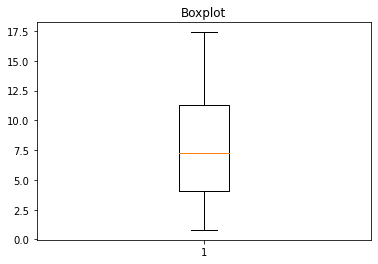

In [7]:
# We now plot the boxplot for the data using each feature independently and check for Outliers
plt.boxplot(crime.Murder);plt.title('Boxplot');plt.show()

# We see that there are Outliers present for "Balance" Feature

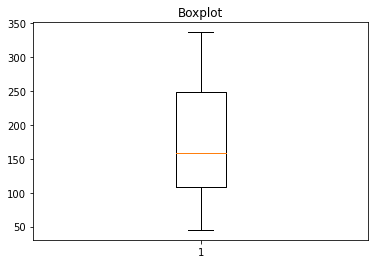

In [8]:
plt.boxplot(crime.Assault);plt.title('Boxplot');plt.show()  # outliers present

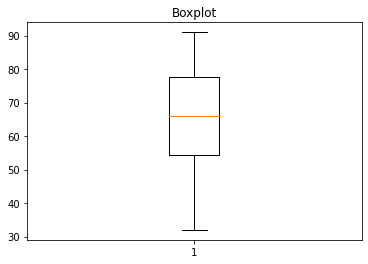

In [9]:
plt.boxplot(crime.UrbanPop);plt.title('Boxplot');plt.show()  # No outliers 

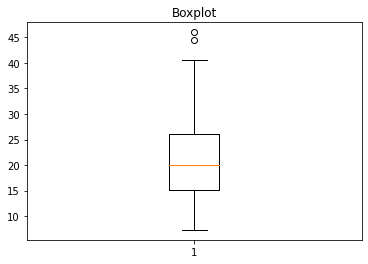

In [10]:
plt.boxplot(crime.Rape);plt.title('Boxplot');plt.show()  # outliers present

Now in order to deal with the outliers we can use one of "3R Techniques" viz:
       1. Rectify
       2. Retain
       3. Remove

In our example we choose let say to keep or retain the data, but how should we keep outliers in the data and work forward?
We use the Winsorization techniue!!! This technique helps modify the sample distribution of random variables by 
removing the outliers and replacing them with the values that constitute the 5th percentile and 95th percentile values,
i.e, all data below 5th percentile gets replaced with the value of the 5th percentile and all the values above 
95th percentile, with the 95th percentile value.

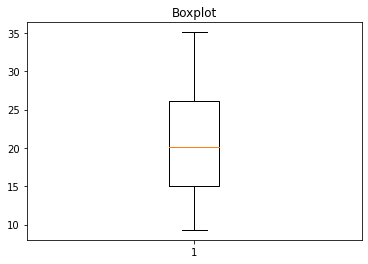

In [11]:
from scipy.stats.mstats import winsorize

crime['Rape'] = winsorize(crime.Rape, limits=[0.07, 0.093])   
plt.boxplot(crime['Rape']);plt.title('Boxplot');plt.show()


In [12]:
# Now we check the data for zero variance values
(crime == 0).all()

State       False
Murder      False
Assault     False
UrbanPop    False
Rape        False
dtype: bool

In [13]:
# We see the data again now to check whether the data is in scale
crime.describe

# we notice that the data needs to be normalise, using normalization

<bound method NDFrame.describe of              State  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  35.1
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  35.1
5         Colorado     7.9      204        78  35.1
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4    

In [14]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

<ipython-input-15-e62e0e231209>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.skew(axis = 0, skipna = True)
<ipython-input-15-e62e0e231209>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.kurtosis(axis = 0, skipna = True)


Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape       -0.883786
dtype: float64

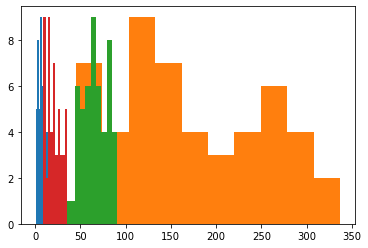

In [15]:
##########################Univariate, Bivariate################
plt.hist(crime["Murder"])   #Univariate

plt.hist(crime["Assault"])

plt.hist(crime["UrbanPop"])

plt.hist(crime["Rape"])

crime.skew(axis = 0, skipna = True) 

crime.kurtosis(axis = 0, skipna = True)

After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

    1. Centroids of newly formed clusters do not change
    2. Points remain in the same cluster
    3. Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot. 

In [16]:
# calculating TWSS - Total within SS using different cluster range
from sklearn.cluster import KMeans

TWSS = []
k = list(range(2, 8))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[7.358376498536079,
 5.532071995078602,
 4.0407678952238815,
 3.5539811127025747,
 3.1628651131109455,
 2.8417637970747243]

Text(0, 0.5, 'total_within_SS')

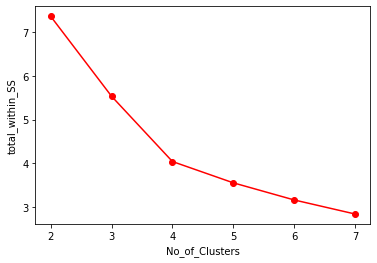

In [17]:
# Plotting the Scree plot using the TWSS from above defined function
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [18]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters, 
# as the curve is seemingly bent or showinf an elbow format at K = 4

model = KMeans(n_clusters = 4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [19]:
model.labels_ # getting the labels of clusters assigned to each row

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [20]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [21]:
crime['clust'] = mb # creating a  new column and assigning it to new column 

In [22]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,35.1,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,35.1,1


In [23]:
crime = crime.iloc[:,[5,0,1,2,3,4]]
crime.head()

,clust,State,Murder,Assault,UrbanPop,Rape
0,2,Alabama,13.2,236,58,21.2
1,1,Alaska,10.0,263,48,35.1
2,1,Arizona,8.1,294,80,31.0
3,2,Arkansas,8.8,190,50,19.5
4,1,California,9.0,276,91,35.1


In [24]:
# We can clearly see that we have the labels in the dataset in the form of a column called "clust", symbolizing the clusters

In [26]:
# In order to see the clusters we aggregate the records within the clusters and group them by the clusters to visualize the 
# 4 nos of clear cluster formed
crime.iloc[:, 1:6].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.600000,78.538462,52.076923,12.446154
1,10.815385,257.384615,76.000000,30.930769
2,13.937500,243.625000,53.750000,21.412500
3,5.656250,138.875000,73.875000,18.843750


We can now clearly see the 4 number of clusters formed, which can be described as under

 1. Cluster3, "2" = Defines the group of states that are high on crime in either if the categories described and need immediate action on high alert.
                      
 2. Cluster2, "1" = Defines the group of states that have comparatively high crime rate and would require action as well
   
 3. Cluster4, "3" = Defines the group of states that are medium on crime rate while the Urbanpop i on high and need action on a alert side
                      
 4. Cluster1, "0" = Defines the group of state that are low on crime rate and would require lesser of an action to be taken, but of course not to be neglected at any cost.